In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

data = pd.read_csv('data/GSE147507_RawReadCounts_Human.tsv', index_col = 0, sep = "\t")
ferret_data = pd.read_csv('data/GSE147507_RawReadCounts_Ferret.tsv', index_col = 0, sep = "\t")

In [22]:
data.head()

,Series1_NHBE_Mock_1,Series1_NHBE_Mock_2,Series1_NHBE_Mock_3,Series1_NHBE_SARS-CoV-2_1,Series1_NHBE_SARS-CoV-2_2,Series1_NHBE_SARS-CoV-2_3,Series2_A549_Mock_1,Series2_A549_Mock_2,Series2_A549_Mock_3,Series2_A549_SARS-CoV-2_1,...,Series15_COVID19Lung_1,Series16_A549-ACE2_Mock_1,Series16_A549-ACE2_Mock_2,Series16_A549-ACE2_Mock_3,Series16_A549-ACE2_SARS-CoV-2_1,Series16_A549-ACE2_SARS-CoV-2_2,Series16_A549-ACE2_SARS-CoV-2_3,Series16_A549-ACE2_SARS-CoV-2_Rux_1,Series16_A549-ACE2_SARS-CoV-2_Rux_2,Series16_A549-ACE2_SARS-CoV-2_Rux_3
DDX11L1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
WASH7P,29,24,23,34,19,44,68,43,33,65,...,0,0,11,7,2,6,5,12,6,8
FAM138A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FAM138F,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OR4F5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
for col_name in ferret_data.columns:
    if '' in col_name:
        print(col_name)

Series10_FerretNW_Ctl_d1_1
Series10_FerretNW_Ctl_d1_2
Series10_FerretNW_SARS-CoV-2_d1_1
Series10_FerretNW_SARS-CoV-2_d1_2
Series11_FerretNW_Ctl_d3_1
Series11_FerretNW_Ctl_d3_2
Series11_FerretNW_SARS-CoV-2_d3_1
Series11_FerretNW_SARS-CoV-2_d3_2
Series12_FerretNW_Ctl_d7_1
Series12_FerretNW_Ctl_d7_2
Series12_FerretNW_SARS-CoV-2_d7_1
Series12_FerretNW_SARS-CoV-2_d7_2
Series12_FerretNW_IAV_d7_1
Series12_FerretNW_IAV_d7_2
Series13_FerretNW_Ctl_d14_1
Series13_FerretNW_Ctl_d14_2
Series13_FerretNW_SARS-CoV-2_d14_1
Series13_FerretNW_SARS-CoV-2_d14_2
Series14_FerretTrachea_Ctl_d3_1
Series14_FerretTrachea_Ctl_d3_2
Series14_FerretTrachea_Ctl_d3_3
Series14_FerretTrachea_Ctl_d3_4
Series14_FerretTrachea_IAV_d3_3
Series14_FerretTrachea_IAV_d3_5
Series14_FerretTrachea_IAV_d3_2
Series14_FerretTrachea_IAV_d3_1
Series14_FerretTrachea_IAV_d3_4
Series14_FerretTrachea_IAV_d3_6
Series14_FerretTrachea_SARS-CoV-2_d3_1
Series14_FerretTrachea_SARS-CoV-2_d3_2
Series14_FerretTrachea_SARS-CoV-2_d3_3
Series14_FerretTr

We have 13 total non infected sets of data for A549 cells and 7 for NHBE cells

In [4]:
NHBE_mock_cols = [col for col in data.columns if '_NHBE_Mock_' in col]
print(NHBE_mock_cols)

NHBE_mock_data = data[NHBE_mock_cols]
NHBE_mock_data = np.log(NHBE_mock_data + 1)

NHBE_mock_mean = NHBE_mock_data.mean(axis = 1)

for col in NHBE_mock_cols:
    print(col, ": ", np.mean(NHBE_mock_mean - NHBE_mock_data[col]))

['Series1_NHBE_Mock_1', 'Series1_NHBE_Mock_2', 'Series1_NHBE_Mock_3', 'Series9_NHBE_Mock_1', 'Series9_NHBE_Mock_2', 'Series9_NHBE_Mock_3', 'Series9_NHBE_Mock_4']
Series1_NHBE_Mock_1 :  -0.16053613247788198
Series1_NHBE_Mock_2 :  -0.13773099738328995
Series1_NHBE_Mock_3 :  -0.4321608263194894
Series9_NHBE_Mock_1 :  0.3770570180274986
Series9_NHBE_Mock_2 :  0.3603962943479907
Series9_NHBE_Mock_3 :  0.20839047887026593
Series9_NHBE_Mock_4 :  -0.21541583506512552


Now check against the infected cells

In [5]:
NHBE_infected_cols = [col for col in data.columns if '_NHBE_SARS-CoV-2_' in col]
print(NHBE_infected_cols)

NHBE_infected_data = data[NHBE_infected_cols]
NHBE_infected_data = np.log(NHBE_infected_data + 1)

for col in NHBE_infected_cols:
    print(col, ": ", np.mean(NHBE_mock_mean - NHBE_infected_data[col]))

['Series1_NHBE_SARS-CoV-2_1', 'Series1_NHBE_SARS-CoV-2_2', 'Series1_NHBE_SARS-CoV-2_3']
Series1_NHBE_SARS-CoV-2_1 :  -0.10174996579978547
Series1_NHBE_SARS-CoV-2_2 :  -0.06765540286820232
Series1_NHBE_SARS-CoV-2_3 :  -0.7694351343108244


In [6]:
kmeans = KMeans(n_clusters=2).fit(NHBE_mock_data.transpose())
centroids = kmeans.cluster_centers_
print(centroids)
print(kmeans.labels_)

[[0.         4.15669354 0.         ... 0.         0.         0.        ]
 [0.         3.26604235 0.         ... 0.         0.         0.        ]]
[1 1 1 0 0 0 0]


In [42]:
A549_mock_cols = [col for col in data.columns if '_A549_Mock_' in col]
print(A549_mock_cols)

A549_mock_data = data[A549_mock_cols]
A549_mock_data = np.log(A549_mock_data + 1)

A549_mock_mean = A549_mock_data.mean(axis = 1)

for col in A549_mock_cols:
    print(col, ": ", np.mean(A549_mock_mean - A549_mock_data[col]))

['Series2_A549_Mock_1', 'Series2_A549_Mock_2', 'Series2_A549_Mock_3', 'Series3_A549_Mock_1', 'Series3_A549_Mock_2', 'Series4_A549_Mock_1', 'Series4_A549_Mock_2', 'Series5_A549_Mock_1', 'Series5_A549_Mock_2', 'Series5_A549_Mock_3', 'Series8_A549_Mock_1', 'Series8_A549_Mock_2', 'Series8_A549_Mock_3']
Series2_A549_Mock_1 :  -0.4733584359656635
Series2_A549_Mock_2 :  -0.06654762709011193
Series2_A549_Mock_3 :  0.12852970495951851
Series3_A549_Mock_1 :  -0.4789973449241167
Series3_A549_Mock_2 :  -0.3945568649661241
Series4_A549_Mock_1 :  0.6188510651706531
Series4_A549_Mock_2 :  0.18585656883117857
Series5_A549_Mock_1 :  -0.4121845774461028
Series5_A549_Mock_2 :  -0.36944089003475994
Series5_A549_Mock_3 :  -0.3260568264902631
Series8_A549_Mock_1 :  1.0031763113691967
Series8_A549_Mock_2 :  0.468759641509843
Series8_A549_Mock_3 :  0.11596927507678936


,Series2_A549_Mock_1,Series2_A549_Mock_2,Series2_A549_Mock_3,Series3_A549_Mock_1,Series3_A549_Mock_2,Series4_A549_Mock_1,Series4_A549_Mock_2,Series5_A549_Mock_1,Series5_A549_Mock_2,Series5_A549_Mock_3,Series8_A549_Mock_1,Series8_A549_Mock_2,Series8_A549_Mock_3
DDX11L1,0.000000,0.00000,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
WASH7P,4.234107,3.78419,3.526361,5.220356,4.859812,2.772589,2.564949,4.174387,3.988984,3.637586,4.234107,2.890372,3.091042
FAM138A,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
FAM138F,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
OR4F5,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
CDY1B,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CDY1,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CSPG4P1Y,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GOLGA2P3Y,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [8]:
kmeans = KMeans(n_clusters=5).fit(A549_mock_data.transpose())
centroids = kmeans.cluster_centers_
print(centroids)
print(kmeans.labels_)

[[0.         3.24163549 0.         ... 0.         0.         0.        ]
 [0.         2.83148024 0.         ... 0.         0.         0.        ]
 [0.         4.2341065  0.         ... 0.         0.         0.        ]
 [0.         4.008766   0.         ... 0.         0.         0.        ]
 [0.34657359 5.04008411 0.         ... 0.         0.         0.        ]]
[3 0 0 4 4 1 0 3 3 3 2 1 0]


In [9]:
A549_infected_cols = [col for col in data.columns if '_A549_SARS-CoV-2_' in col]
print(A549_infected_cols)

A549_infected_data = data[A549_infected_cols]
A549_infected_data = np.log(A549_infected_data + 1)

A549_infected_mean = A549_infected_data.mean(axis = 1)

for col in A549_infected_cols:
    print(col, ": ", np.mean(A549_infected_mean - A549_infected_data[col]))

['Series2_A549_SARS-CoV-2_1', 'Series2_A549_SARS-CoV-2_2', 'Series2_A549_SARS-CoV-2_3', 'Series5_A549_SARS-CoV-2_1', 'Series5_A549_SARS-CoV-2_2', 'Series5_A549_SARS-CoV-2_3']
Series2_A549_SARS-CoV-2_1 :  -0.13906555913463234
Series2_A549_SARS-CoV-2_2 :  0.012147579461039464
Series2_A549_SARS-CoV-2_3 :  0.20333561593101532
Series5_A549_SARS-CoV-2_1 :  0.15844082871311654
Series5_A549_SARS-CoV-2_2 :  0.07351064101925174
Series5_A549_SARS-CoV-2_3 :  -0.30836910598978995


#### PCA for cluster visualization

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

NHBE_complete_data = pd.concat([NHBE_mock_data, NHBE_infected_data], axis = 1).transpose()
raw_y = NHBE_complete_data.index

NHBE_complete_data = pd.DataFrame(data = StandardScaler().fit_transform(NHBE_complete_data), columns = NHBE_complete_data.columns)

y = []
for t in raw_y:
    tmp = t.split('_')
    y += [tmp[2] + '_' + tmp[0][-1]]

print(y)
    
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(NHBE_complete_data)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
principalDf.insert(2, "Type", y)

print(principalDf)

pca.explained_variance_ratio_

['Mock_1', 'Mock_1', 'Mock_1', 'Mock_9', 'Mock_9', 'Mock_9', 'Mock_9', 'SARS-CoV-2_1', 'SARS-CoV-2_1', 'SARS-CoV-2_1']
          PC1         PC2          Type
0   22.589964  -50.288363        Mock_1
1   12.180885  -49.877660        Mock_1
2  105.052504  -12.527118        Mock_1
3 -143.058483    6.576053        Mock_9
4 -138.747173   12.291163        Mock_9
5  -94.637406   51.432526        Mock_9
6   30.943675  111.344274        Mock_9
7    3.001440  -41.527914  SARS-CoV-2_1
8   -5.826216  -60.515412  SARS-CoV-2_1
9  208.500809   33.092453  SARS-CoV-2_1


array([0.61674514, 0.15820102])

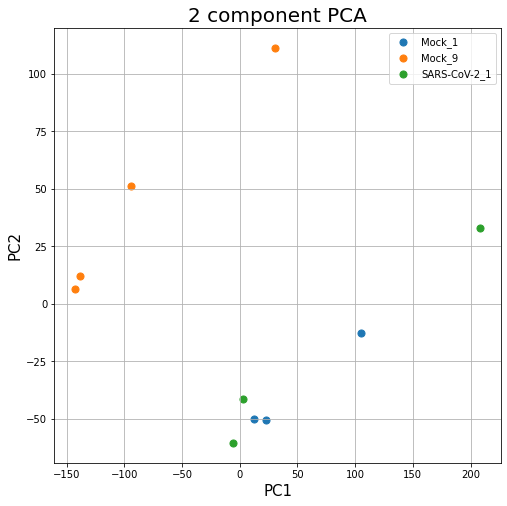

In [11]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = np.unique(y)
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = principalDf['Type'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'PC1']
               , principalDf.loc[indicesToKeep, 'PC2']
               , s = 50)
ax.legend(targets)
ax.grid()

In [12]:
A549_complete_data = pd.concat([A549_mock_data, A549_infected_data], axis = 1).transpose()
raw_A549_y = A549_complete_data.index

A549_complete_data = pd.DataFrame(data = StandardScaler().fit_transform(A549_complete_data), columns = A549_complete_data.columns)

A549_y = []
for t in raw_A549_y:
    tmp = t.split('_')
    A549_y += [tmp[2] + '_' + tmp[0][-1]]

print(A549_y)
    
pca = PCA(n_components=2)

principalComponents_A549 = pca.fit_transform(A549_complete_data)
principalDf_A549 = pd.DataFrame(data = principalComponents_A549, columns = ['PC1', 'PC2'])
principalDf_A549.insert(2, "Type", A549_y)

print(principalDf_A549)

pca.explained_variance_ratio_

['Mock_2', 'Mock_2', 'Mock_2', 'Mock_3', 'Mock_3', 'Mock_4', 'Mock_4', 'Mock_5', 'Mock_5', 'Mock_5', 'Mock_8', 'Mock_8', 'Mock_8', 'SARS-CoV-2_2', 'SARS-CoV-2_2', 'SARS-CoV-2_2', 'SARS-CoV-2_5', 'SARS-CoV-2_5', 'SARS-CoV-2_5']
           PC1         PC2          Type
0   -71.979414    5.919226        Mock_2
1    21.861854   -5.079095        Mock_2
2    66.640114  -11.556311        Mock_2
3   -65.600199  121.518331        Mock_3
4   -43.512320   96.373786        Mock_3
5   182.815074  -33.349013        Mock_4
6    80.444838  -26.477669        Mock_4
7   -64.783024   -5.793938        Mock_5
8   -54.715165  -13.326921        Mock_5
9   -44.178324  -13.210215        Mock_5
10  259.092488   65.423744        Mock_8
11  142.408231  -31.403449        Mock_8
12   60.715384  -27.885767        Mock_8
13 -108.236151    0.204838  SARS-CoV-2_2
14  -74.602823    5.111546  SARS-CoV-2_2
15  -30.081247   -2.151728  SARS-CoV-2_2
16  -43.119878  -46.915904  SARS-CoV-2_5
17  -60.478159  -46.387203  SARS-Co

array([0.59252857, 0.11020135])

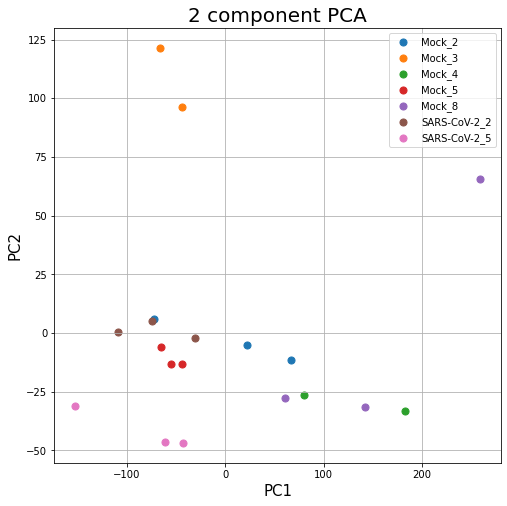

In [13]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = np.unique(A549_y)

for target in targets:
    indicesToKeep = principalDf_A549['Type'] == target
    ax.scatter(principalDf_A549.loc[indicesToKeep, 'PC1']
               , principalDf_A549.loc[indicesToKeep, 'PC2']
               , s = 50)
ax.legend(targets)
ax.grid()

### Feature Selection

In [14]:
from sklearn.feature_selection import VarianceThreshold

NHBE_filtered_data = NHBE_complete_data.loc[:,NHBE_complete_data.apply(pd.Series.nunique) != 1]
print("Removing variables with 0 variance: ", 21797 - len(NHBE_filtered_data.columns), " removed")

A549_filtered_data = A549_complete_data.loc[:,A549_complete_data.apply(pd.Series.nunique) != 1]
print("Removing variables with 0 variance: ", 21797 - len(A549_filtered_data), " removed")

Removing variables with 0 variance:  4798  removed
Removing variables with 0 variance:  21778  removed


In [15]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression

NHBE_int_y = []
labels = pd.unique(y)
for t in y:
    NHBE_int_y += [np.where(labels == t)[0][0]]
    
print(NHBE_int_y)

SelectPercentile(f_regression, percentile=10).fit_transform(NHBE_filtered_data, NHBE_int_y)

[0, 0, 0, 1, 1, 1, 1, 2, 2, 2]


array([[-1.04126779, -0.33333333, -0.5       , ..., -0.91529056,
        -0.33333333, -0.33333333],
       [-0.78583747, -0.33333333, -0.5       , ..., -0.91529056,
        -0.33333333, -0.33333333],
       [-0.82018599, -0.33333333, -0.5       , ..., -0.91529056,
        -0.33333333, -0.33333333],
       ...,
       [ 0.02300488, -0.33333333,  2.        , ...,  1.86465104,
         3.        , -0.33333333],
       [-1.04126779, -0.33333333, -0.5       , ...,  0.47468024,
        -0.33333333, -0.33333333],
       [ 1.7139883 ,  3.        ,  2.        , ...,  1.28776103,
        -0.33333333,  3.        ]])

# Data description

There are two main types of cells analysed, NHBE (human bronchial epithelial cells) and A549 (transformed lung alveolar cells) and one additional type, Calu3 (lung adenocarcinoma epithelial cells). There is one additional series (Series 15) with cells from a lung biopsy from both uninfected and infected patients.



### NHBE cells

In [16]:
NHBE_data = data[['Series1_NHBE_Mock_1', 'Series1_NHBE_Mock_2', 'Series1_NHBE_Mock_3', 'Series1_NHBE_SARS-CoV-2_1', 'Series1_NHBE_SARS-CoV-2_2', 'Series1_NHBE_SARS-CoV-2_3']]

Firstly, we can check the standard deviation between the healthy series and between the infected series

(array([[2.1783e+04, 9.0000e+00, 4.0000e+00, 1.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [2.1684e+04, 7.2000e+01, 2.5000e+01, 6.0000e+00, 1.0000e+00,
         2.0000e+00, 3.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00]]),
 array([     0.        ,  12091.66743271,  24183.33486543,  36275.00229814,
         48366.66973085,  60458.33716357,  72550.00459628,  84641.67202899,
         96733.3394617 , 108825.00689442, 120916.67432713]),
 <a list of 2 Lists of Patches objects>)

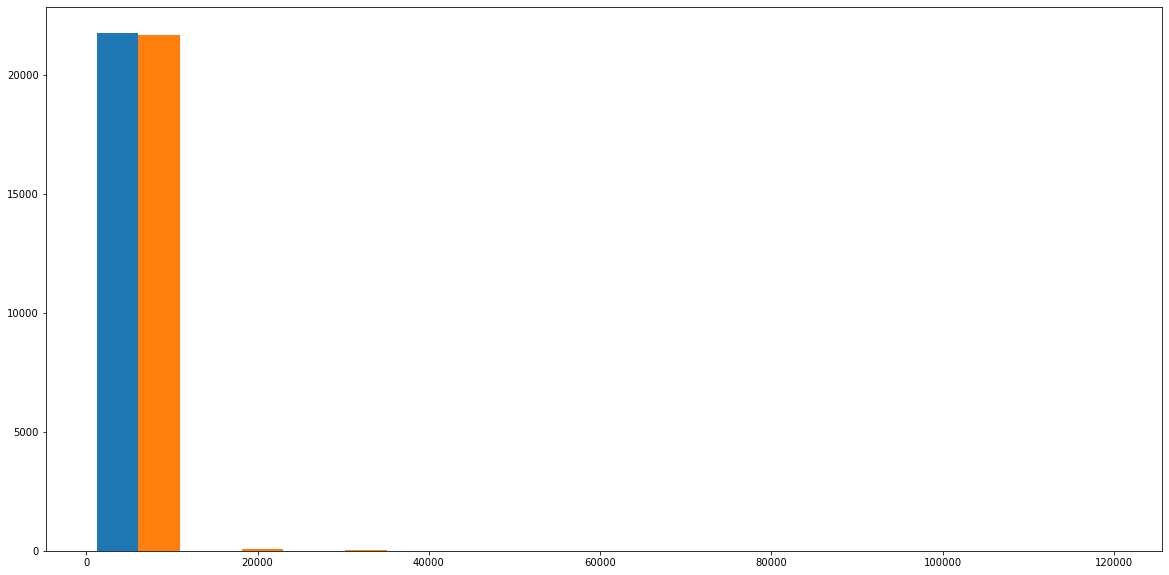

In [17]:
plt.figure(figsize=(20,10))
plt.hist([NHBE_data[['Series1_NHBE_Mock_1', 'Series1_NHBE_Mock_2', 'Series1_NHBE_Mock_3']].std(axis = 1), NHBE_data[['Series1_NHBE_SARS-CoV-2_1', 'Series1_NHBE_SARS-CoV-2_2', 'Series1_NHBE_SARS-CoV-2_3']].std(axis = 1)])

As we can see, the data is highly skewed (very small amount of genes account for the vast majority of the change). So we can attempt to apply a log transformation to see if it improves results

In [18]:
NHBE_data_log = np.log(NHBE_data + 1)

NHBE_data_log.insert(len(NHBE_data_log.columns), "S1_healthy_std", NHBE_data_log[['Series1_NHBE_Mock_1', 'Series1_NHBE_Mock_2', 'Series1_NHBE_Mock_3']].std(axis = 1))
NHBE_data_log.insert(len(NHBE_data_log.columns), "S1_infected_std", NHBE_data_log[['Series1_NHBE_SARS-CoV-2_1', 'Series1_NHBE_SARS-CoV-2_2', 'Series1_NHBE_SARS-CoV-2_3']].std(axis = 1))

# Also compute the std of all healthy series
NHBE_data_log.insert(len(NHBE_data_log.columns), "healthy_std", NHBE_data_log[NHBE_mock_cols].std(axis = 1))

NHBE_data_log = NHBE_data_log.loc[:, NHBE_data_log["healthy_std"] != 0]


KeyError: "['Series9_NHBE_Mock_3', 'Series9_NHBE_Mock_4', 'Series9_NHBE_Mock_1', 'Series9_NHBE_Mock_2'] not in index"

In [ ]:
import matplotlib.pyplot as plt

bins = np.arange(0, 2, 0.2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
axes[0].hist(NHBE_data_log["S1_healthy_std"], bins = bins, align = "mid")
axes[0].set_title("Healthy Cells: Standard Deviation")
axes[0].set_xlabel("Standard Deviation")
axes[0].set_ylabel("Count")
axes[0].set_xticks(bins)

axes[1].hist(NHBE_data_log["S1_infected_std"], bins = bins)
axes[1].set_title("Infected Cells: Standard Deviation")
axes[1].set_xlabel("Standard Deviation")
axes[1].set_ylabel("Count")
axes[1].set_xticks(bins)
fig.tight_layout()

In [ ]:
NHBE_data_log.insert(len(NHBE_data_log.columns), "mean_healthy", NHBE_data_log[['Series1_NHBE_Mock_1', 'Series1_NHBE_Mock_2', 'Series1_NHBE_Mock_3']].mean(axis = 1))
NHBE_data_log.insert(len(NHBE_data_log.columns), "mean_infected", NHBE_data_log[['Series1_NHBE_SARS-CoV-2_1', 'Series1_NHBE_SARS-CoV-2_2', 'Series1_NHBE_SARS-CoV-2_3']].mean(axis = 1))
NHBE_data_log.insert(len(NHBE_data_log.columns), "mean_diff", NHBE_data_log["mean_healthy"] - NHBE_data_log["mean_infected"])


In [ ]:
px.histogram(NHBE_data_log, x = "mean_diff", nbins = 50).show()